<a href="https://colab.research.google.com/github/Swastikraj599/FOODEASE/blob/main/RESNET101.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet101
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

In [19]:
# Define paths
train_dir = '/content/sample_data/data1/training1'
test_dir = '/content/sample_data/data1/testing1'

# Image Data Generators with basic augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1.0/255)

# Flow from directory
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Get the number of classes from the train_generator after it's initialized
num_classes = train_generator.num_classes

Found 64 images belonging to 7 classes.
Found 16 images belonging to 7 classes.


In [20]:
# Load ResNet101 with pre-trained weights, without the top layer
base_model = ResNet101(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model
base_model.trainable = False

# Add custom layers on top
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

# Define the model
model = Model(inputs=base_model.input, outputs=predictions)


In [21]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])


In [22]:
# Define paths
train_dir = '/content/sample_data/data1/training1'
test_dir = '/content/sample_data/data1/testing1'

# Image Data Generators with basic augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1.0/255)

# Flow from directory
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Get the number of classes from the train_generator after it's initialized
num_classes = train_generator.num_classes

# Load ResNet101 with pre-trained weights, without the top layer
base_model = ResNet101(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model
base_model.trainable = False

# Add custom layers on top
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
# Use num_classes directly to define the output layer
predictions = Dense(num_classes, activation='softmax')(x)

# Define the model
model = Model(inputs=base_model.input, outputs=predictions)

model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)

Found 64 images belonging to 7 classes.
Found 16 images belonging to 7 classes.
Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 49s 21s/step - accuracy: 0.2812 - loss: 1.9029 - val_accuracy: 0.2500 - val_loss: 2.1450
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 36s 16s/step - accuracy: 0.4375 - loss: 1.3560 - val_accuracy: 0.3125 - val_loss: 2.0263
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 41s 16s/step - accuracy: 0.4792 - loss: 1.0899 - val_accuracy: 0.2500 - val_loss: 1.9686
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 41s 16s/step - accuracy: 0.5833 - loss: 1.0831 - val_accuracy: 0.3125 - val_loss: 1.9848
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 43s 17s/step - accuracy: 0.6042 - loss: 0.9930 - val_accuracy: 0.3750 - val_loss: 2.2155
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 28s 16s/step - accuracy: 0.5417 - loss: 1.0130 - val_accuracy: 0.3750 - val_loss: 2.2936
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 28s 16s/step - accuracy: 0.5312 - loss: 0.9269 - val_accuracy: 0.2500 - val_loss: 2.2997
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 41s 16s/s

In [23]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')


1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.3125 - loss: 1.9430
Test Accuracy: 31.25%


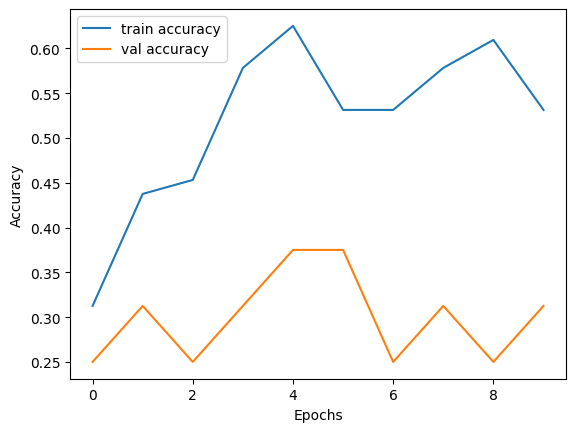

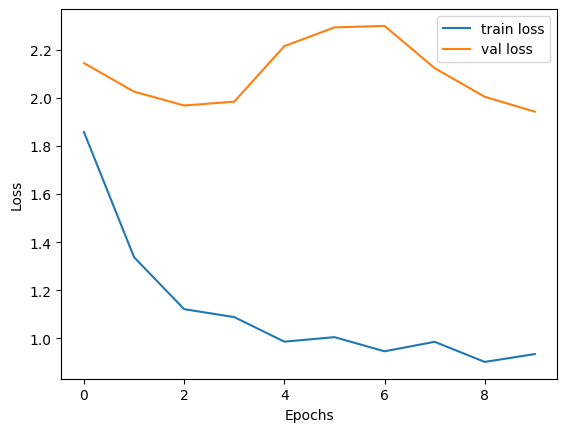

In [24]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
